<a href="https://colab.research.google.com/github/Dey-Aniket/ComparingImages/blob/main/Compare_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [3]:
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

In [22]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread("/content/drive/MyDrive/DataFolder/ImageFolder/big_boss.JPG")
contrast = cv2.imread("/content/drive/MyDrive/DataFolder/ImageFolder/minion.jpg")
#shopped = cv2.imread("/content/gdrive/MyDrive/colab/jp_gates_photoshopped.png")
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
contrast = cv2.resize (contrast, (640,270)) 
#shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

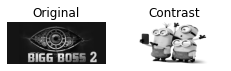

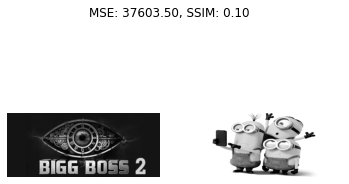

In [23]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
#compare_images(original, original, "Original vs. Original")
compare_images(original, contrast, "Original vs. Contrast")
#compare_images(original, shopped, "Original vs. Photoshopped")